In [68]:
import os
from cv2 import cv2
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [69]:
dir = r"C:\Users\mhasa\Desktop\mvcnn_gray_roi_28px"
image_paths = list(paths.list_images(dir))
categories = np.unique([p.split(os.path.sep)[-2] for p in image_paths])

In [70]:
def load_trained_cnn(model_name):
    data_dir = r"C:\Users\mhasa\GDrive\mvcnn"
    # load the model
    loaded_model = load_model(f"{data_dir}//{model_name}")
    print(loaded_model.summary())
    return loaded_model
cnn_model = load_trained_cnn("model_mvcnn_color_roi_10class_28px1px_255_minvgg.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

In [71]:
# read the image and create signature
def load_and_preprocess_image(image_name, preprocess=True):

    thresh = 180
    max_val = 255
    target_image_size = 28

    data_dir = r"C:\Users\mhasa\Desktop\draw_samples"
    img = cv2.imread(f"{data_dir}//{image_name}.JPG", cv2.IMREAD_GRAYSCALE)
    resizedROI = img


    if preprocess == True:
        # do inverse thresholding
        th, dst_bin = cv2.threshold(img.copy(),
                                    thresh=thresh,
                                    maxval=max_val,
                                    type=cv2.THRESH_BINARY_INV)

        # find all contours in the image
        contours, hierarchy = cv2.findContours(dst_bin,
                                               cv2.RETR_EXTERNAL,
                                               cv2.CHAIN_APPROX_NONE)

        # then find bounding box ROI
        #new_image = dst_bin.copy()
        new_image = img.copy()
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)

            # extract the ROI
            pad = 10
            roi = new_image[y - pad:y + h + pad, x - pad:x + w + pad]

            # resize the ROI
            # resizedROI = aap.preprocess(roi)
            resizedROI = cv2.resize(roi, (target_image_size, target_image_size))

    return resizedROI

In [72]:
# predict the image
def predict_image_content(processed_image, model):

    processed_image = processed_image / 255.0
    # channel dim and batch dim since we doing feature extraction
    processed_image = np.expand_dims(processed_image, axis=-1)
    processed_image = np.expand_dims(processed_image, axis=0)
    return model.predict(processed_image)

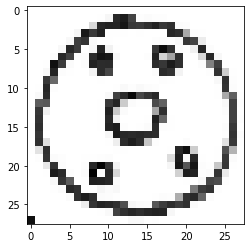

In [77]:
img = load_and_preprocess_image("gasket", preprocess=True)
plt.imshow(img, cmap='gray')

In [78]:
prediction = predict_image_content(img, cnn_model)
detected_part = categories[np.argmax(prediction)]
print(detected_part)

O-Rings
